# Day0328

In [1]:
!pip install seaborn --upgrade

In [2]:
!pip install koreanize_matplotlib

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

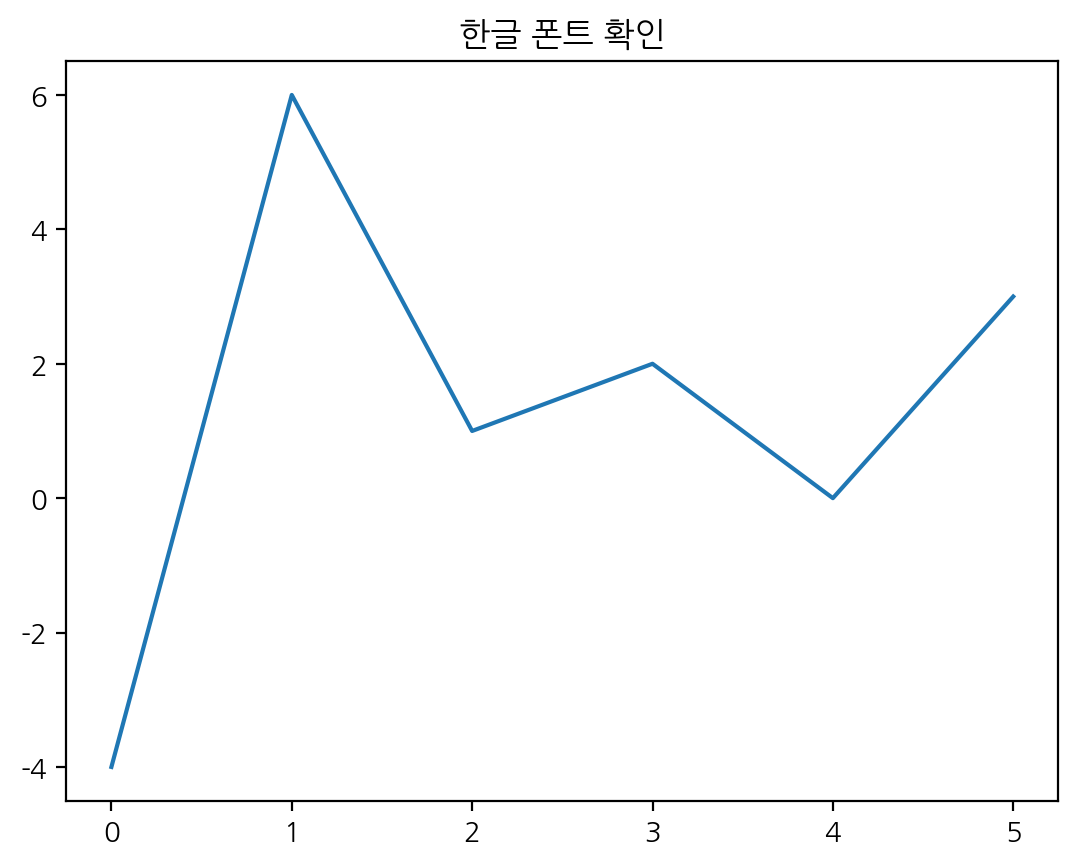

In [5]:
# 그래프 한글 적용 여부 확인
plt.title('한글 폰트 확인')
plt.plot([-4,6,1,2,0,3])

In [6]:
df = pd.read_csv('./소상공인시장진흥공단_상가(상권)정보_서울_202412.csv')
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700009628,홈처치스쿨,NaN,P1,교육,P107,교육 지원,P10799,기타 교육지원 서비스업,P85709,...,1123011000102560217000901,NaN,서울특별시 동대문구 신이문로8길 5,130827,2411,NaN,NaN,NaN,127.063553,37.602687
1,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
2,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
3,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786
4,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553530,MA0106202201A1649562,환명상원,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,...,1111017000100770000008442,NaN,서울특별시 종로구 성균관로 44,110530,3069,NaN,NaN,NaN,126.996819,37.586603
553531,MA0106202201A0125744,올리스푼,NaN,G2,소매,G221,기타 상품 소매,G22199,그 외 기타 상품 전문 소매업,G47859,...,1150010300107890019020562,NaN,서울특별시 강서구 곰달래로60가길 46,157897,7785,NaN,NaN,NaN,126.860663,37.530082
553532,MA010120220808362513,스튜디오익센트릭,NaN,M1,과학·기술,M112,전문 디자인,M11203,시각 디자인업,M73203,...,1168010800102180017027140,NaN,서울특별시 강남구 언주로121길 4-5,135829,6106,NaN,2,NaN,127.035007,37.512004
553533,MA010120220804126513,두찜강남,논현점,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1168010800102180017027140,NaN,서울특별시 강남구 언주로121길 4-5,135829,6106,NaN,1,NaN,127.035007,37.512004


In [7]:
# 행, 열 갯수 파악
df.shape

(553535, 39)

In [8]:
# 행 개수
df.shape[0]

553535

In [9]:
# 열 개수
df.shape[1]

39

In [10]:
# 행 출력 default -> 60, 열 출력 default -> 20
# 열 최대 출력 갯수 40개로 변경
pd.options.display.max_columns = 40
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700009628,홈처치스쿨,NaN,P1,교육,P107,교육 지원,P10799,기타 교육지원 서비스업,P85709,기타 교육지원 서비스업,11,서울특별시,11230,동대문구,11230750,이문2동,1123011000,이문동,1123011000102560217,1,대지,256.0,217.0,서울특별시 동대문구 이문동 256-217,112304115224,서울특별시 동대문구 신이문로8길,5.0,NaN,1123011000102560217000901,NaN,서울특별시 동대문구 신이문로8길 5,130827,2411,NaN,NaN,NaN,127.063553,37.602687
1,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110540,삼청동,1111014000,삼청동,1111014000100280021,1,대지,28.0,21.0,서울특별시 종로구 삼청동 28-21,111103100007,서울특별시 종로구 삼청로,122.0,1.0,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
2,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11650,서초구,11650531,서초4동,1165010800,서초동,1165010800113080025,1,대지,1308.0,25.0,서울특별시 서초구 서초동 1308-25,116504163432,서울특별시 서초구 서초대로73길,40.0,NaN,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
3,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11200,성동구,11200790,용답동,1120012200,용답동,1120012200100040011,1,대지,4.0,11.0,서울특별시 성동구 용답동 4-11,112004109494,서울특별시 성동구 용답중앙15길,18.0,NaN,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786
4,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11110,종로구,11110615,종로1.2.3.4가동,1111015400,장사동,1111015400100800000,1,대지,80.0,NaN,서울특별시 종로구 장사동 80,111104100055,서울특별시 종로구 돈화문로4길,30.0,NaN,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553530,MA0106202201A1649562,환명상원,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,두발 미용업,11,서울특별시,11110,종로구,11110650,혜화동,1111017000,명륜1가,1111017000100750001,1,대지,75.0,1.0,서울특별시 종로구 명륜1가 75-1,111103100008,서울특별시 종로구 성균관로,44.0,NaN,1111017000100770000008442,NaN,서울특별시 종로구 성균관로 44,110530,3069,NaN,NaN,NaN,126.996819,37.586603
553531,MA0106202201A0125744,올리스푼,NaN,G2,소매,G221,기타 상품 소매,G22199,그 외 기타 상품 전문 소매업,G47859,그 외 기타 분류 안된 상품 전문 소매업,11,서울특별시,11500,강서구,11500570,화곡4동,1150010300,화곡동,1150010300107890019,1,대지,789.0,19.0,서울특별시 강서구 화곡동 789-19,115004145165,서울특별시 강서구 곰달래로60가길,46.0,NaN,1150010300107890019020562,NaN,서울특별시 강서구 곰달래로60가길 46,157897,7785,NaN,NaN,NaN,126.860663,37.530082
553532,MA010120220808362513,스튜디오익센트릭,NaN,M1,과학·기술,M112,전문 디자인,M11203,시각 디자인업,M73203,시각 디자인업,11,서울특별시,11680,강남구,11680531,논현2동,1168010800,논현동,1168010800102180017,1,대지,218.0,17.0,서울특별시 강남구 논현동 218-17,116804166568,서울특별시 강남구 언주로121길,4.0,5.0,1168010800102180017027140,NaN,서울특별시 강남구 언주로121길 4-5,135829,6106,NaN,2,NaN,127.035007,37.512004
553533,MA010120220804126513,두찜강남,논현점,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11680,강남구,11680531,논현2동,1168010800,논현동,1168010800102180017,1,대지,218.0,17.0,서울특별시 강남구 논현동 218-17,116804166568,서울특별시 강남구 언주로121길,4.0,5.0,1168010800102180017027140,NaN,서울특별시 강남구 언주로121길 4-5,135829,6106,NaN,1,NaN,127.035007,37.512004


In [11]:
# 위에서 5개 데이터 확인
df.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700009628,홈처치스쿨,NaN,P1,교육,P107,교육 지원,P10799,기타 교육지원 서비스업,P85709,기타 교육지원 서비스업,11,서울특별시,11230,동대문구,11230750,이문2동,1123011000,이문동,1123011000102560217,1,대지,256.0,217.0,서울특별시 동대문구 이문동 256-217,112304115224,서울특별시 동대문구 신이문로8길,5.0,NaN,1123011000102560217000901,NaN,서울특별시 동대문구 신이문로8길 5,130827,2411,NaN,NaN,NaN,127.063553,37.602687
1,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110540,삼청동,1111014000,삼청동,1111014000100280021,1,대지,28.0,21.0,서울특별시 종로구 삼청동 28-21,111103100007,서울특별시 종로구 삼청로,122.0,1.0,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
2,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11650,서초구,11650531,서초4동,1165010800,서초동,1165010800113080025,1,대지,1308.0,25.0,서울특별시 서초구 서초동 1308-25,116504163432,서울특별시 서초구 서초대로73길,40.0,NaN,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
3,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11200,성동구,11200790,용답동,1120012200,용답동,1120012200100040011,1,대지,4.0,11.0,서울특별시 성동구 용답동 4-11,112004109494,서울특별시 성동구 용답중앙15길,18.0,NaN,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786
4,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11110,종로구,11110615,종로1.2.3.4가동,1111015400,장사동,1111015400100800000,1,대지,80.0,NaN,서울특별시 종로구 장사동 80,111104100055,서울특별시 종로구 돈화문로4길,30.0,NaN,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025


In [12]:
# 밑에서부터 5개 데이터 확인
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
553530,MA0106202201A1649562,환명상원,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,두발 미용업,11,서울특별시,11110,종로구,11110650,혜화동,1111017000,명륜1가,1111017000100750001,1,대지,75.0,1.0,서울특별시 종로구 명륜1가 75-1,111103100008,서울특별시 종로구 성균관로,44.0,NaN,1111017000100770000008442,NaN,서울특별시 종로구 성균관로 44,110530,3069,NaN,NaN,NaN,126.996819,37.586603
553531,MA0106202201A0125744,올리스푼,NaN,G2,소매,G221,기타 상품 소매,G22199,그 외 기타 상품 전문 소매업,G47859,그 외 기타 분류 안된 상품 전문 소매업,11,서울특별시,11500,강서구,11500570,화곡4동,1150010300,화곡동,1150010300107890019,1,대지,789.0,19.0,서울특별시 강서구 화곡동 789-19,115004145165,서울특별시 강서구 곰달래로60가길,46.0,NaN,1150010300107890019020562,NaN,서울특별시 강서구 곰달래로60가길 46,157897,7785,NaN,NaN,NaN,126.860663,37.530082
553532,MA010120220808362513,스튜디오익센트릭,NaN,M1,과학·기술,M112,전문 디자인,M11203,시각 디자인업,M73203,시각 디자인업,11,서울특별시,11680,강남구,11680531,논현2동,1168010800,논현동,1168010800102180017,1,대지,218.0,17.0,서울특별시 강남구 논현동 218-17,116804166568,서울특별시 강남구 언주로121길,4.0,5.0,1168010800102180017027140,NaN,서울특별시 강남구 언주로121길 4-5,135829,6106,NaN,2,NaN,127.035007,37.512004
553533,MA010120220804126513,두찜강남,논현점,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11680,강남구,11680531,논현2동,1168010800,논현동,1168010800102180017,1,대지,218.0,17.0,서울특별시 강남구 논현동 218-17,116804166568,서울특별시 강남구 언주로121길,4.0,5.0,1168010800102180017027140,NaN,서울특별시 강남구 언주로121길 4-5,135829,6106,NaN,1,NaN,127.035007,37.512004
553534,MA0106202311A0600261,두찜강남,논현점,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11680,강남구,11680531,논현2동,1168010800,논현동,1168010800102190033,1,대지,219.0,33.0,서울특별시 강남구 논현동 219-33,116804166568,서울특별시 강남구 언주로121길,10.0,NaN,1168010800102190033007613,NaN,서울특별시 강남구 언주로121길 10,135829,6106,NaN,2,NaN,127.034769,37.511608


In [13]:
# 인덱스 확인
df.index

RangeIndex(start=0, stop=553535, step=1)

In [14]:
# 컬럼 확인
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [15]:
# 열 데이터 탐색
df.dtypes

상가업소번호        object
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지        float64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지        float64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호          int64
동정보          float64
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553535 entries, 0 to 553534
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     553535 non-null  object 
 1   상호명        553535 non-null  object 
 2   지점명        49419 non-null   object 
 3   상권업종대분류코드  553535 non-null  object 
 4   상권업종대분류명   553535 non-null  object 
 5   상권업종중분류코드  553535 non-null  object 
 6   상권업종중분류명   553535 non-null  object 
 7   상권업종소분류코드  553535 non-null  object 
 8   상권업종소분류명   553535 non-null  object 
 9   표준산업분류코드   553343 non-null  object 
 10  표준산업분류명    553343 non-null  object 
 11  시도코드       553535 non-null  int64  
 12  시도명        553535 non-null  object 
 13  시군구코드      553535 non-null  int64  
 14  시군구명       553535 non-null  object 
 15  행정동코드      553535 non-null  int64  
 16  행정동명       553535 non-null  object 
 17  법정동코드      553535 non-null  int64  
 18  법정동명       553535 non-null  object 
 19  지번코드       553535 non-n

In [17]:
df.describe

<bound method NDFrame.describe of                       상가업소번호         상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
0       MA010120220700009628       홈처치스쿨  NaN        P1       교육      P107   
1       MA010120220800000033    부동산임대김은숙  NaN        I2       음식      I212   
2       MA010120220800000036   한국황토건축연구소  NaN        L1      부동산      L102   
3       MA010120220800000077  소망공인중개사사무소  NaN        L1      부동산      L102   
4       MA010120220800000084         고향집  NaN        I2       음식      I201   
...                      ...         ...  ...       ...      ...       ...   
553530  MA0106202201A1649562        환명상원  NaN        S2    수리·개인      S207   
553531  MA0106202201A0125744        올리스푼  NaN        G2       소매      G221   
553532  MA010120220808362513    스튜디오익센트릭  NaN        M1    과학·기술      M112   
553533  MA010120220804126513        두찜강남  논현점        I2       음식      I201   
553534  MA0106202311A0600261        두찜강남  논현점        I2       음식      I201   

        상권업종중분류명 상권업종소분류코드   

# Day0331

In [18]:
# 결측치 확인
# isnull() == isna()
# 결측값 정보를 변수 n에 저장
n = df.isnull().sum()
n

상가업소번호            0
상호명               0
지점명          504116
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드        192
표준산업분류명         192
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지            60
지번부번지         93958
지번주소              0
도로명코드             0
도로명               0
건물본번지            10
건물부번지        481753
건물관리번호         1489
건물명          284203
도로명주소             0
구우편번호             0
신우편번호             0
동정보          553535
층정보          175429
호정보          553535
경도                0
위도                0
dtype: int64

<Axes: >

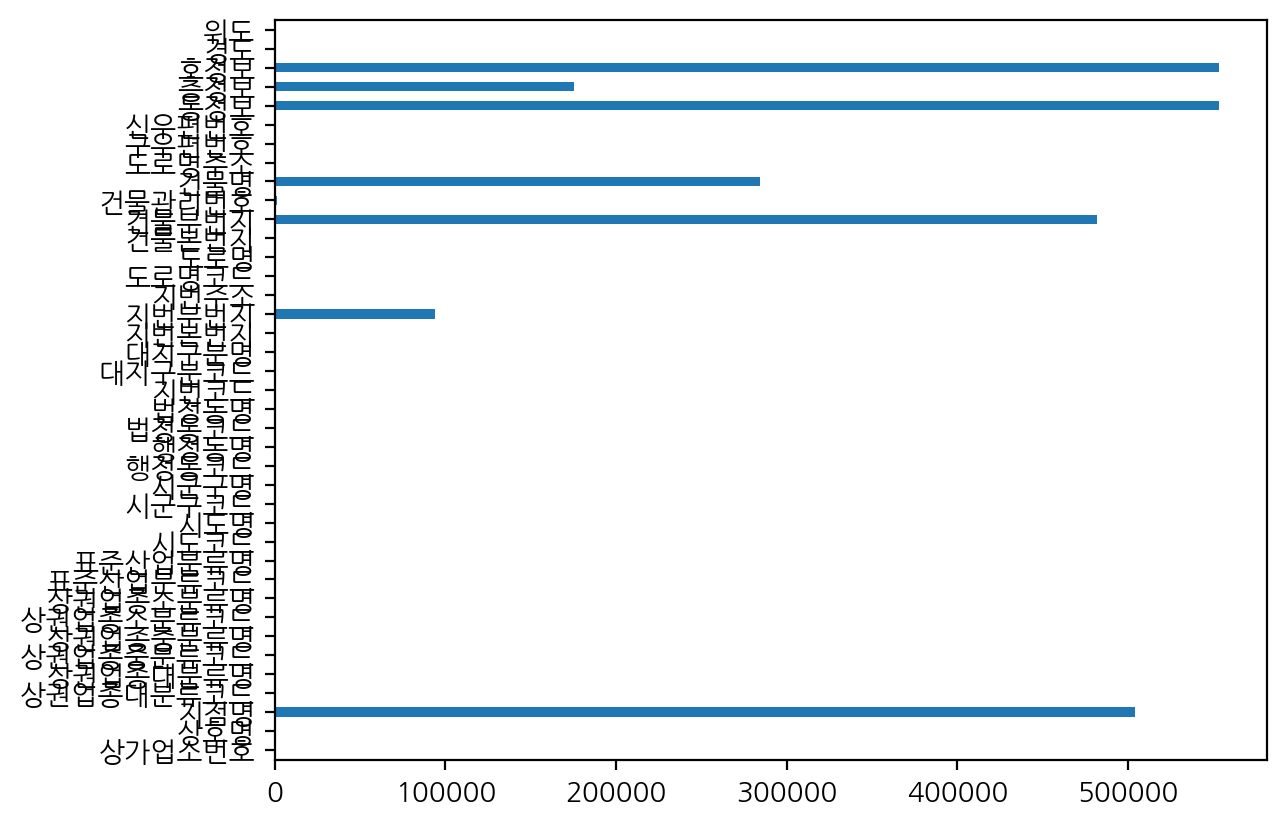

In [19]:
# 결측값을 막대그래프로 시각화
# barh() -> x축을 y축으로 바꿈
n.plot.barh()

<Axes: >

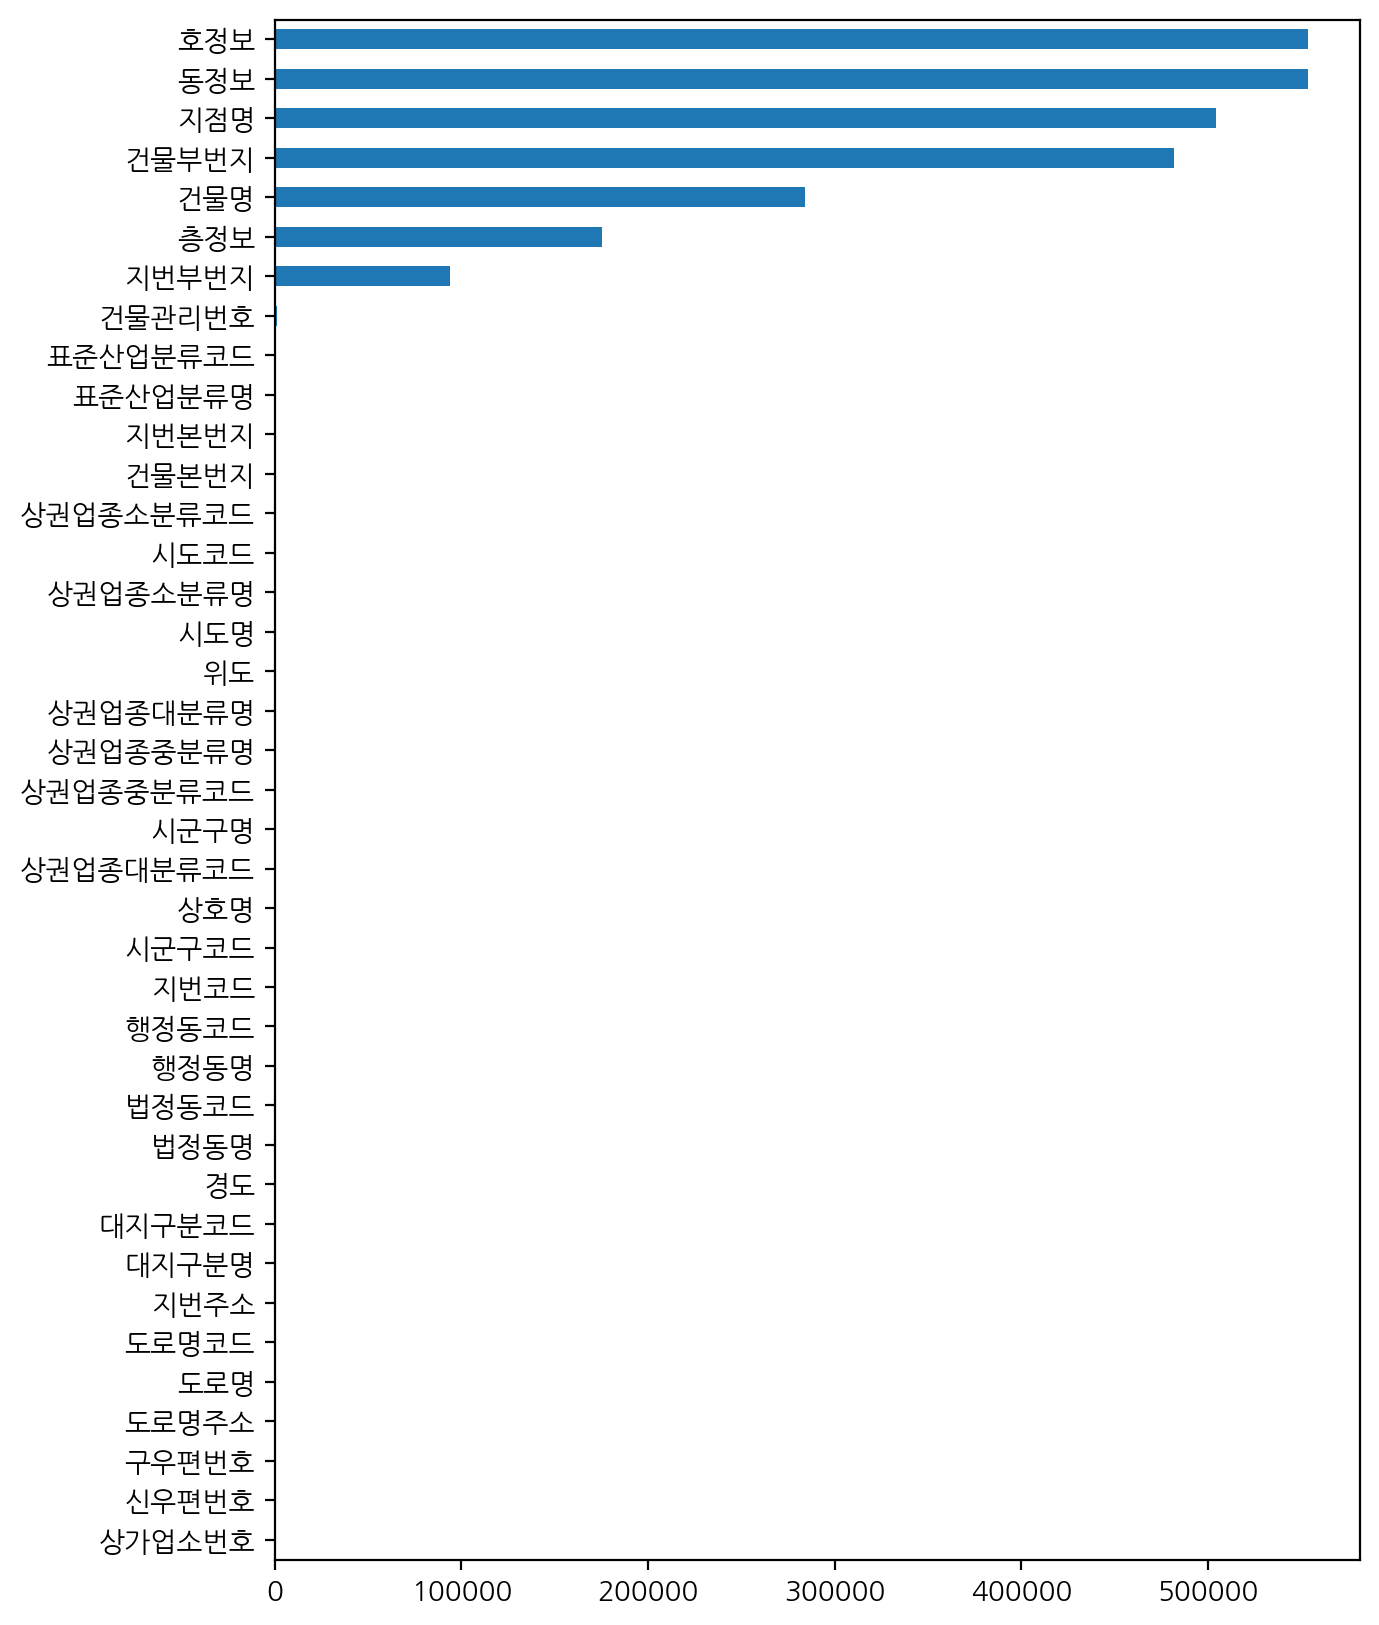

In [20]:
# 결측치 정렬해서 막대그래프로 시각화
# sort_values() -> 기본 정렬 기준 : 오름차순 (0 -> 100, a -> z, ㄱ -> ㅎ)

n.sort_values().plot.barh(figsize = (7,10))

In [21]:
!pip install missingno

In [22]:
import missingno as mn

<Axes: >

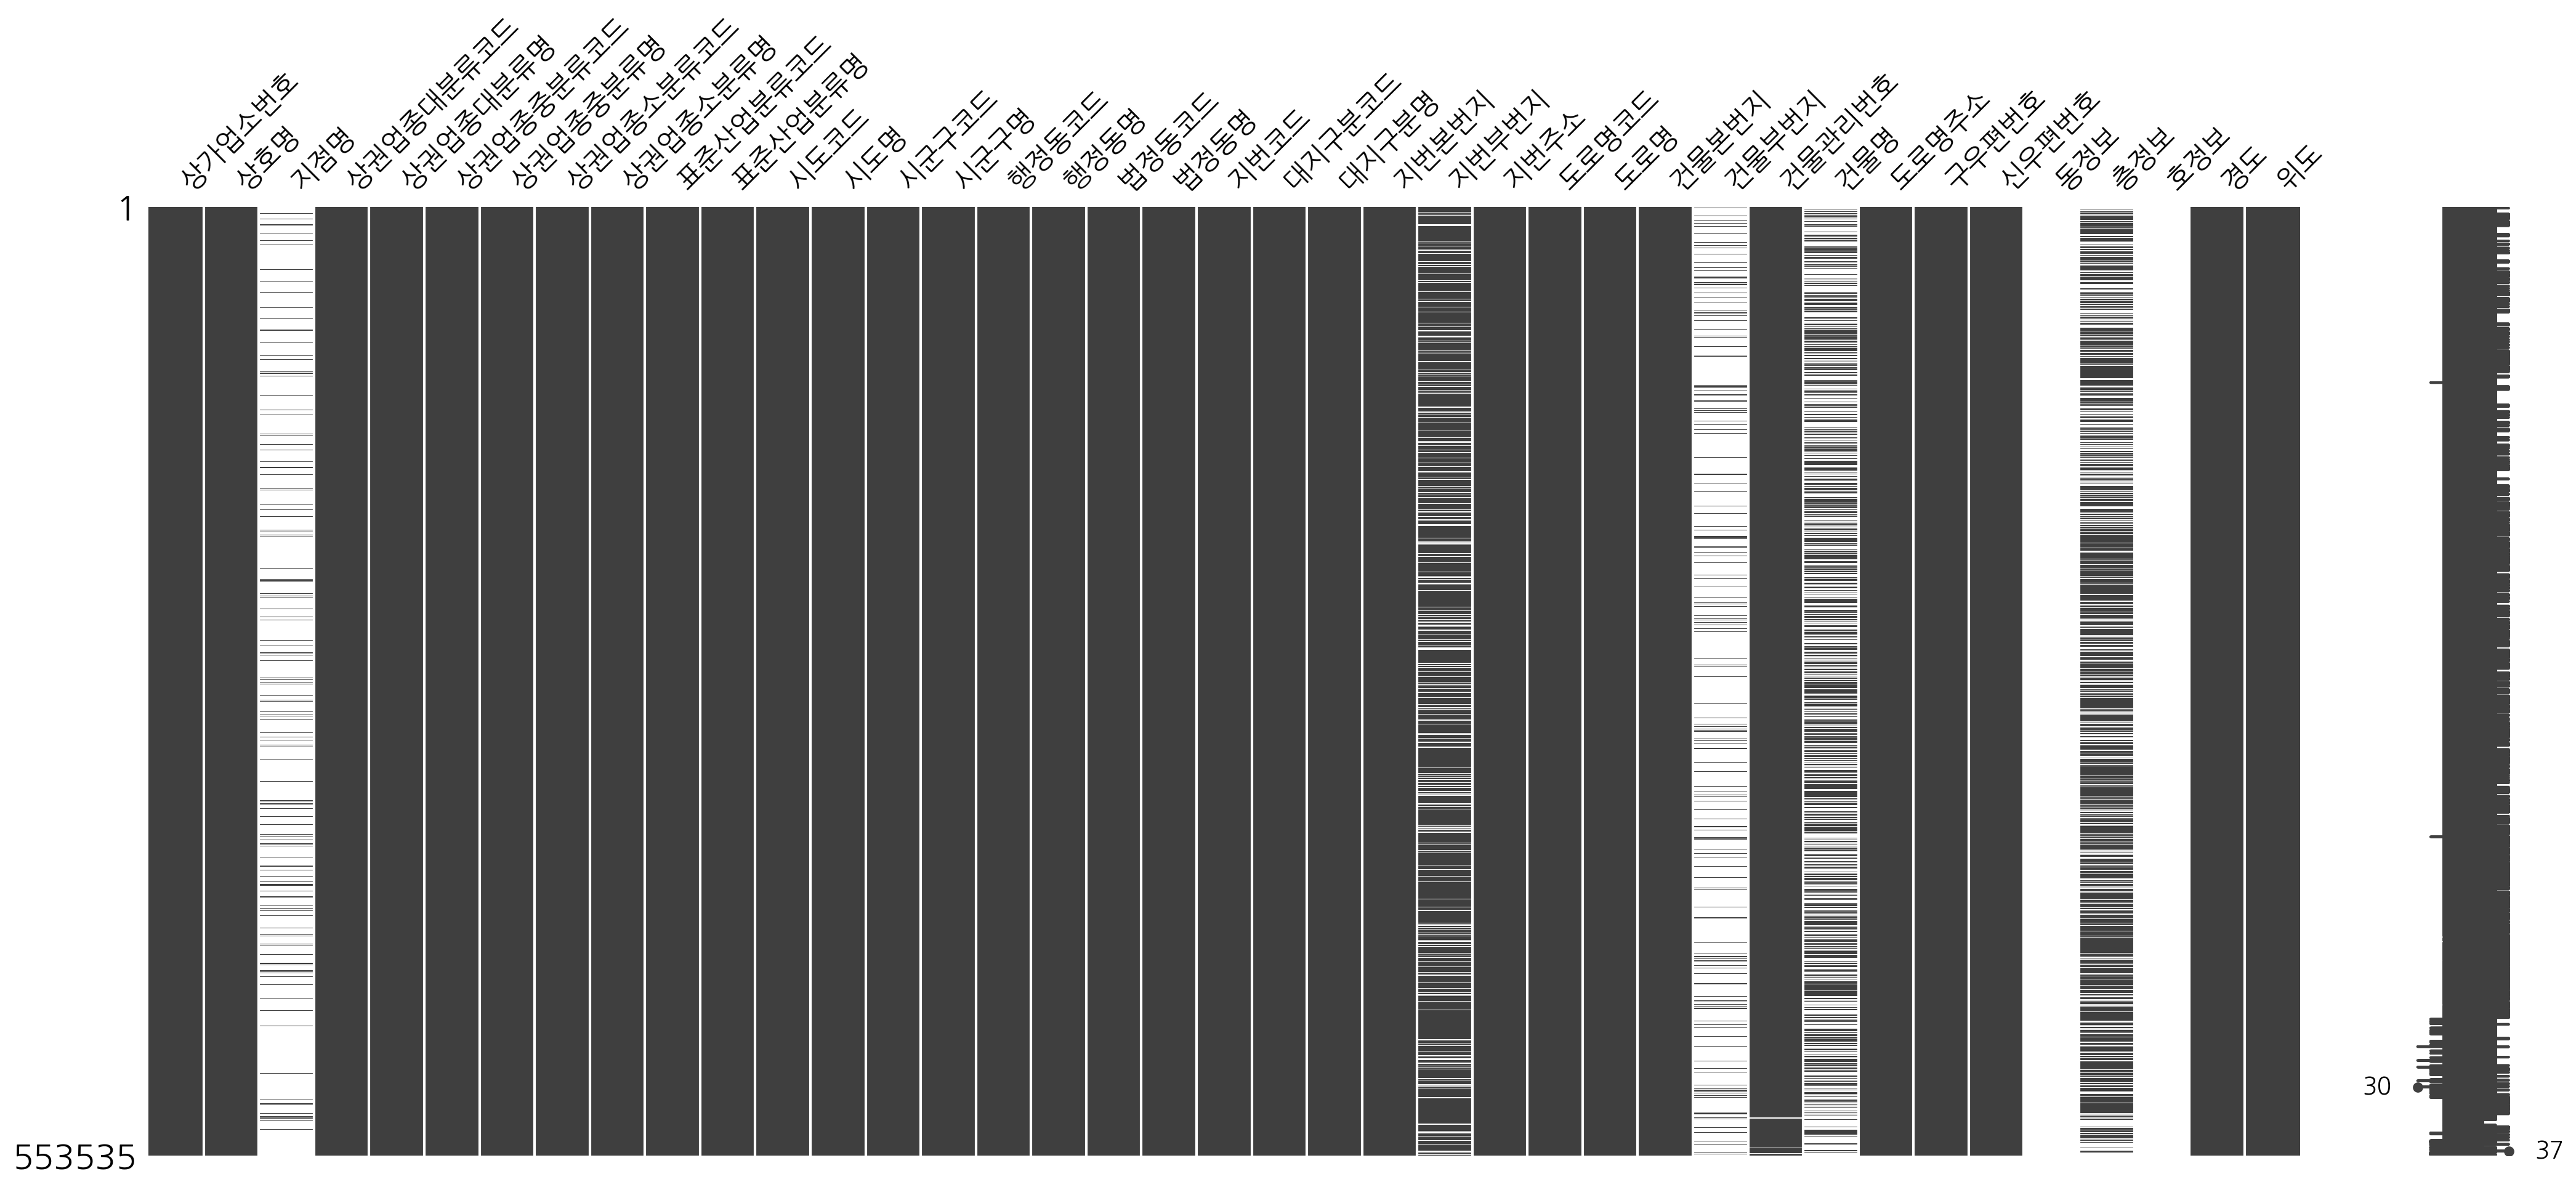

In [23]:
# 메트릭스형으로 df의 결측값 확인
mn.matrix(df)

<Axes: >

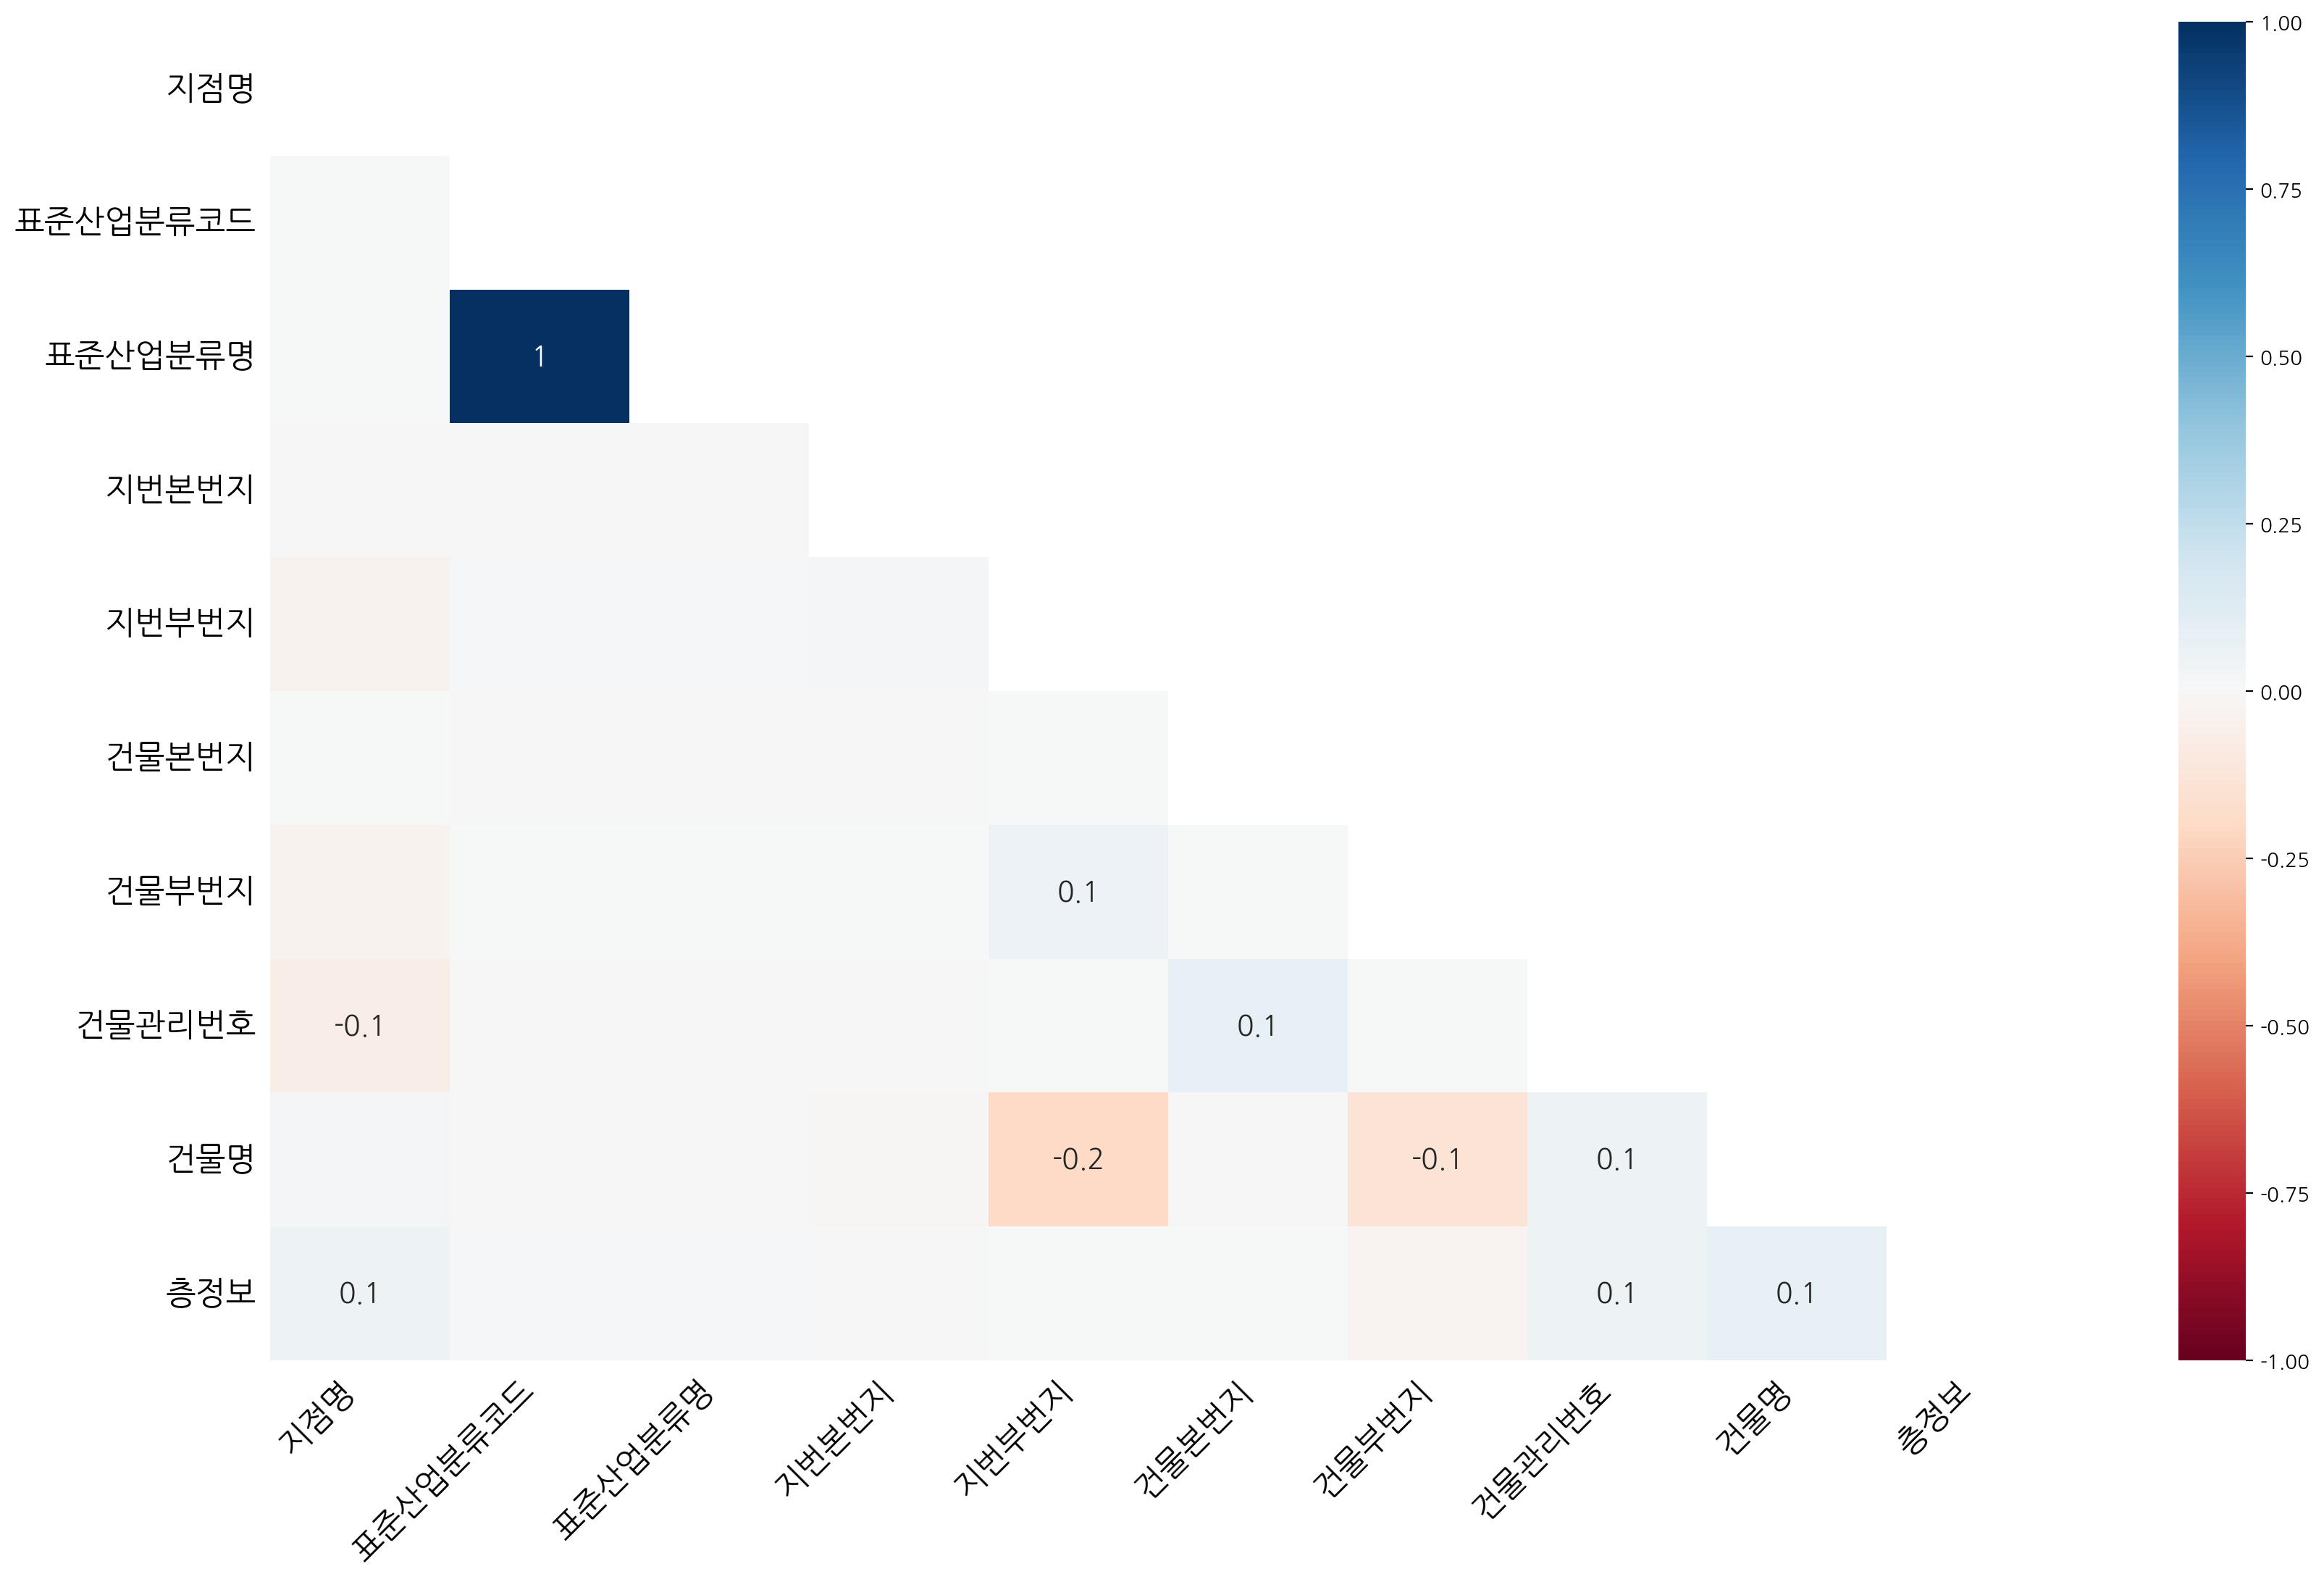

In [24]:
# heatmap으로 df의 결측값 확인
mn.heatmap(df)

<Axes: >

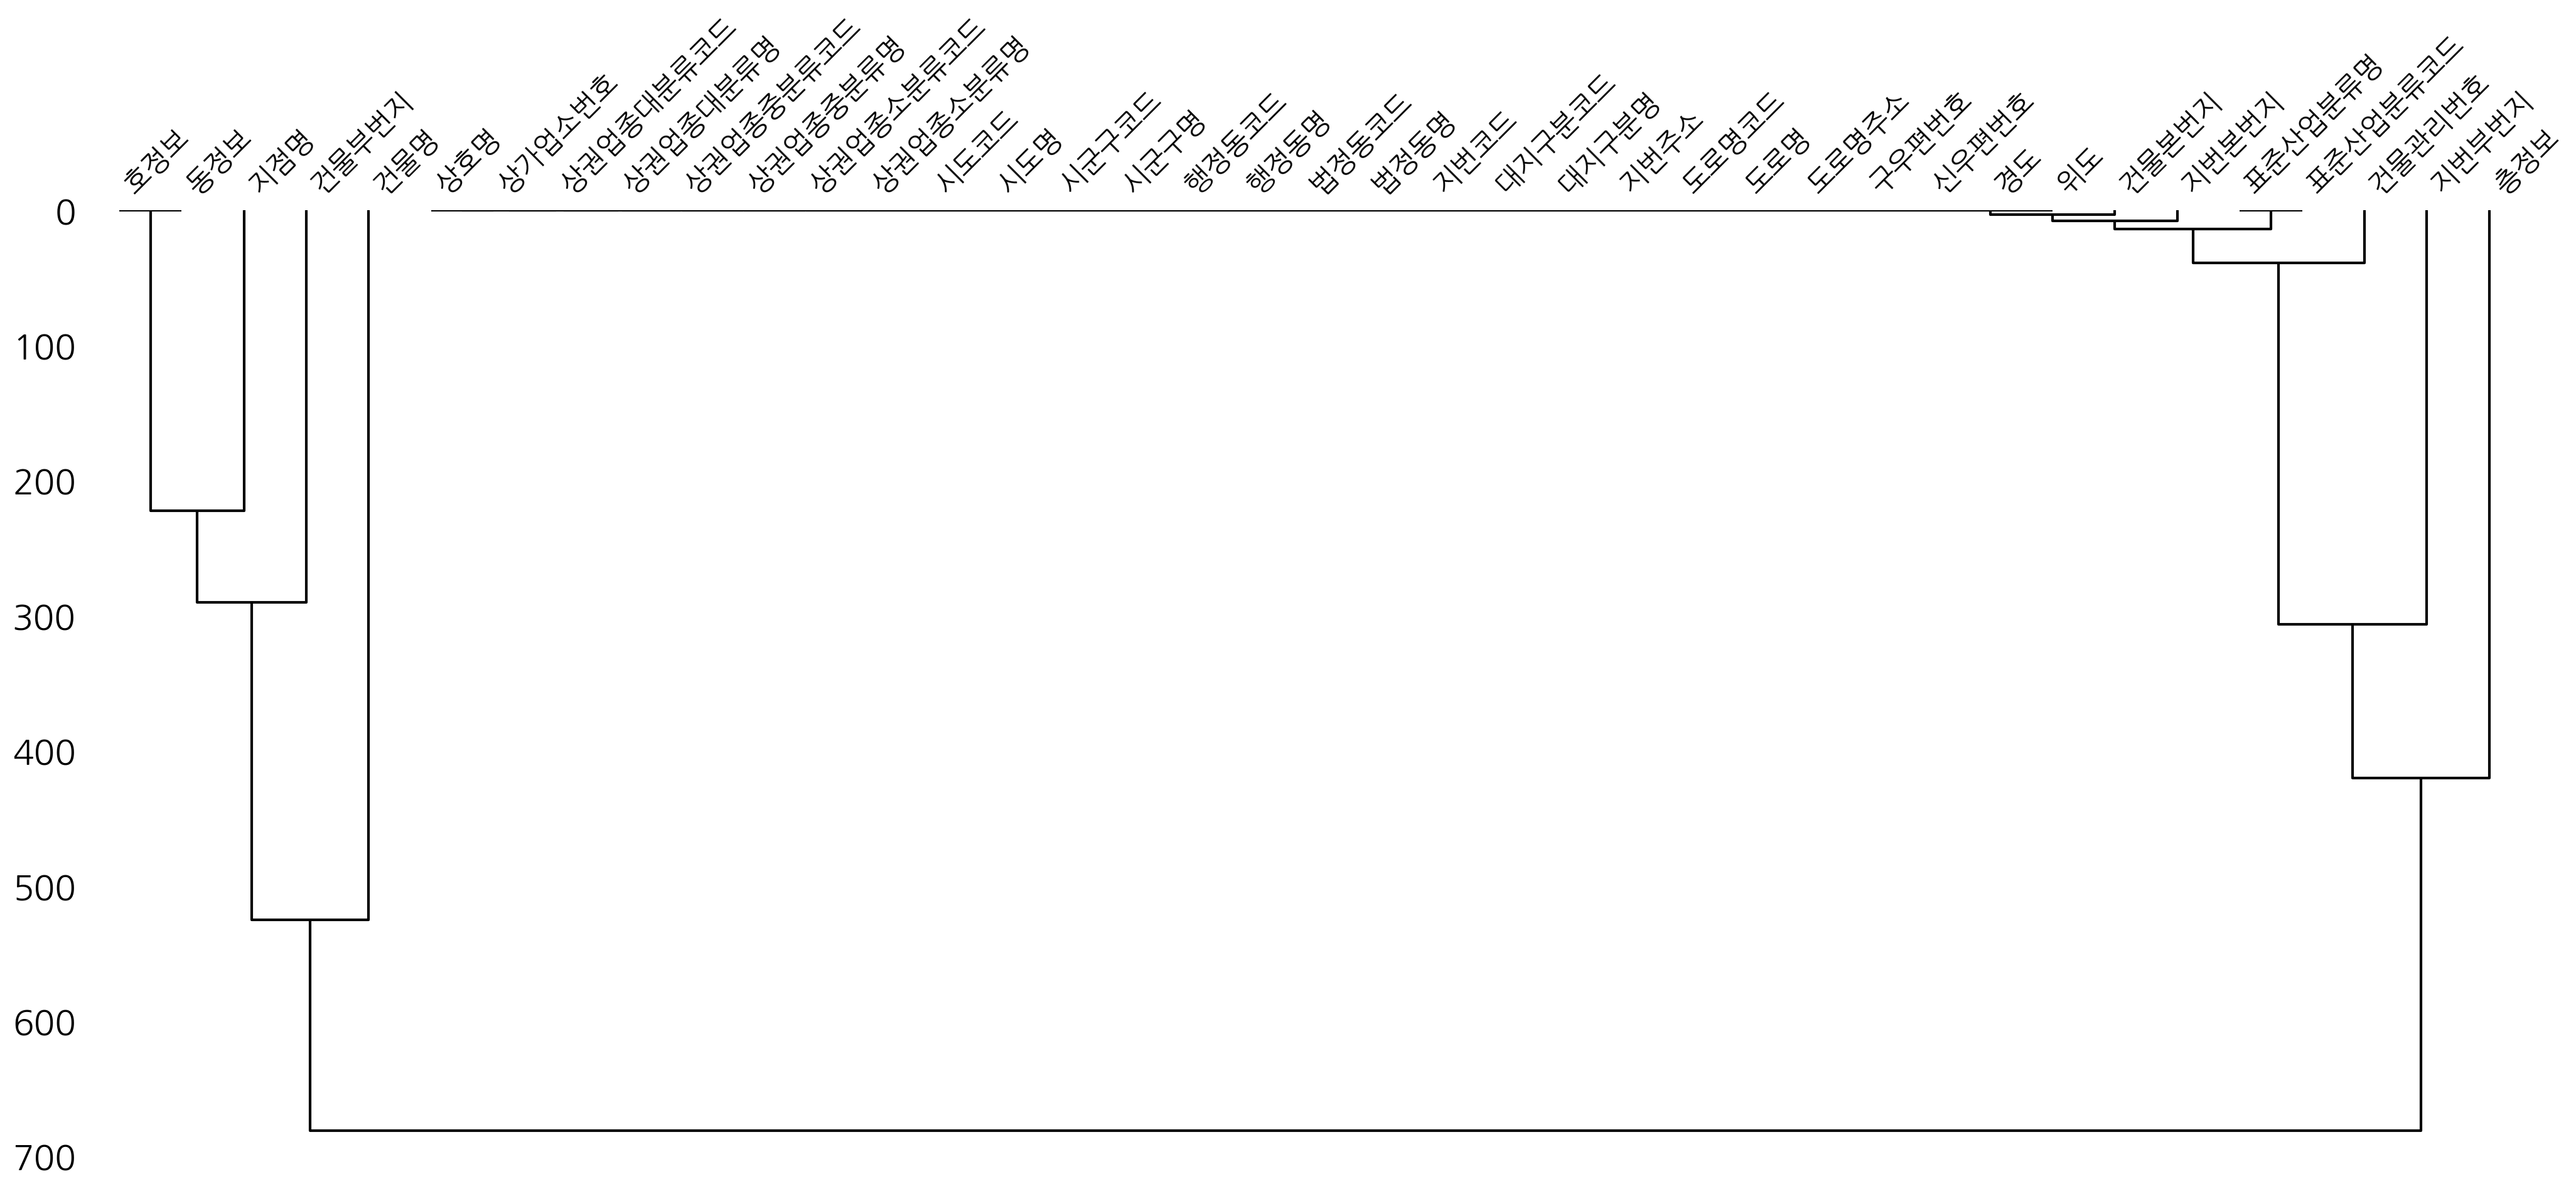

In [25]:
# dendogram으로 결측값 확인
mn.dendrogram(df)

In [26]:
# 데이터 확인
df.head()

# 삭제할 컬럼들
# 상가업소번호, 상권업종대분류코드, 상권업종중분류코드, 상권업종소분류코드, 
# 표준산업분류코드, 시도코드, 시군구코드, 행정동코드, 법정동코드, 
# 지번코드, 대지구분코드, 지번본번지, 지번부번지, 도로명코드, 건물본번지, 
# 건물부번지, 건물관리번호, 구우편번호, 신우편번호

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700009628,홈처치스쿨,NaN,P1,교육,P107,교육 지원,P10799,기타 교육지원 서비스업,P85709,기타 교육지원 서비스업,11,서울특별시,11230,동대문구,11230750,이문2동,1123011000,이문동,1123011000102560217,1,대지,256.0,217.0,서울특별시 동대문구 이문동 256-217,112304115224,서울특별시 동대문구 신이문로8길,5.0,NaN,1123011000102560217000901,NaN,서울특별시 동대문구 신이문로8길 5,130827,2411,NaN,NaN,NaN,127.063553,37.602687
1,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110540,삼청동,1111014000,삼청동,1111014000100280021,1,대지,28.0,21.0,서울특별시 종로구 삼청동 28-21,111103100007,서울특별시 종로구 삼청로,122.0,1.0,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
2,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11650,서초구,11650531,서초4동,1165010800,서초동,1165010800113080025,1,대지,1308.0,25.0,서울특별시 서초구 서초동 1308-25,116504163432,서울특별시 서초구 서초대로73길,40.0,NaN,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
3,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11200,성동구,11200790,용답동,1120012200,용답동,1120012200100040011,1,대지,4.0,11.0,서울특별시 성동구 용답동 4-11,112004109494,서울특별시 성동구 용답중앙15길,18.0,NaN,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786
4,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11110,종로구,11110615,종로1.2.3.4가동,1111015400,장사동,1111015400100800000,1,대지,80.0,NaN,서울특별시 종로구 장사동 80,111104100055,서울특별시 종로구 돈화문로4길,30.0,NaN,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025


In [27]:
# 결측치가 너무 많거나, 데이터가 중복되는 컬럼 제거하기
# 해당 컬럼(열) 이름만 따로 저장하기
cols = df.columns
cols

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [28]:
# 안 쓸 컬럼(열) 이름만 저장하기
# 번호와 코드, 번지가 포함된 컬럼(열) ㅣ름만 가져와서 not_use_cols 에 저장하기
not_use_cols = cols[cols.str.contains('번호|코드|번지')]
not_use_cols

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '표준산업분류코드', '시도코드',
       '시군구코드', '행정동코드', '법정동코드', '지번코드', '대지구분코드', '지번본번지', '지번부번지', '도로명코드',
       '건물본번지', '건물부번지', '건물관리번호', '구우편번호', '신우편번호'],
      dtype='object')

In [29]:
# 삭제 전 데이터프레임 행, 열 현황
print(df.shape)

(553535, 39)


In [30]:
# not_use_cols 에 저장된 컬럼 삭제
# drop(삭제할 데이터, 삭제할 축)
df = df.drop(not_use_cols, axis = 1)
df

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물명,도로명주소,동정보,층정보,호정보,경도,위도
0,홈처치스쿨,NaN,교육,교육 지원,기타 교육지원 서비스업,기타 교육지원 서비스업,서울특별시,동대문구,이문2동,이문동,대지,서울특별시 동대문구 이문동 256-217,서울특별시 동대문구 신이문로8길,NaN,서울특별시 동대문구 신이문로8길 5,NaN,NaN,NaN,127.063553,37.602687
1,부동산임대김은숙,NaN,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,삼청동,삼청동,대지,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,NaN,서울특별시 종로구 삼청로 122-1,NaN,NaN,NaN,126.981840,37.586250
2,한국황토건축연구소,NaN,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,서초구,서초4동,서초동,대지,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,강남오피스텔,서울특별시 서초구 서초대로73길 40,NaN,11,NaN,127.024563,37.500924
3,소망공인중개사사무소,NaN,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,성동구,용답동,용답동,대지,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,NaN,서울특별시 성동구 용답중앙15길 18,NaN,1,NaN,127.054262,37.564786
4,고향집,NaN,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,종로구,종로1.2.3.4가동,장사동,대지,서울특별시 종로구 장사동 80,서울특별시 종로구 돈화문로4길,NaN,서울특별시 종로구 돈화문로4길 30,NaN,NaN,NaN,126.993820,37.570025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553530,환명상원,NaN,수리·개인,이용·미용,미용실,두발 미용업,서울특별시,종로구,혜화동,명륜1가,대지,서울특별시 종로구 명륜1가 75-1,서울특별시 종로구 성균관로,NaN,서울특별시 종로구 성균관로 44,NaN,NaN,NaN,126.996819,37.586603
553531,올리스푼,NaN,소매,기타 상품 소매,그 외 기타 상품 전문 소매업,그 외 기타 분류 안된 상품 전문 소매업,서울특별시,강서구,화곡4동,화곡동,대지,서울특별시 강서구 화곡동 789-19,서울특별시 강서구 곰달래로60가길,NaN,서울특별시 강서구 곰달래로60가길 46,NaN,NaN,NaN,126.860663,37.530082
553532,스튜디오익센트릭,NaN,과학·기술,전문 디자인,시각 디자인업,시각 디자인업,서울특별시,강남구,논현2동,논현동,대지,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,NaN,서울특별시 강남구 언주로121길 4-5,NaN,2,NaN,127.035007,37.512004
553533,두찜강남,논현점,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,강남구,논현2동,논현동,대지,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,NaN,서울특별시 강남구 언주로121길 4-5,NaN,1,NaN,127.035007,37.512004


In [32]:
# 삭제 후 데이터프레임 행, 열 현황
print(df.shape)

(553535, 20)


In [36]:
# 결측값이 많은 컬럼(열) 제거
not_use_cols2 = df.isnull().sum()
not_use_cols2

상호명              0
지점명         504116
상권업종대분류명         0
상권업종중분류명         0
상권업종소분류명         0
표준산업분류명        192
시도명              0
시군구명             0
행정동명             0
법정동명             0
대지구분명            0
지번주소             0
도로명              0
건물명         284203
도로명주소            0
동정보         553535
층정보         175429
호정보         553535
경도               0
위도               0
dtype: int64

In [42]:
# not_use_cols2 정렬하기
not_cols2 = not_use_cols2.sort_values().tail().index
not_cols2

Index(['층정보', '건물명', '지점명', '동정보', '호정보'], dtype='object')

In [43]:
print(df.shape)

(553535, 20)


In [47]:
df.drop(not_cols2, axis = 1,inplace = True)

In [48]:
df

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소,경도,위도
0,홈처치스쿨,교육,교육 지원,기타 교육지원 서비스업,기타 교육지원 서비스업,서울특별시,동대문구,이문2동,이문동,대지,서울특별시 동대문구 이문동 256-217,서울특별시 동대문구 신이문로8길,서울특별시 동대문구 신이문로8길 5,127.063553,37.602687
1,부동산임대김은숙,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,삼청동,삼청동,대지,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
2,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,서초구,서초4동,서초동,대지,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,서울특별시 서초구 서초대로73길 40,127.024563,37.500924
3,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,성동구,용답동,용답동,대지,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,서울특별시 성동구 용답중앙15길 18,127.054262,37.564786
4,고향집,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,종로구,종로1.2.3.4가동,장사동,대지,서울특별시 종로구 장사동 80,서울특별시 종로구 돈화문로4길,서울특별시 종로구 돈화문로4길 30,126.993820,37.570025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553530,환명상원,수리·개인,이용·미용,미용실,두발 미용업,서울특별시,종로구,혜화동,명륜1가,대지,서울특별시 종로구 명륜1가 75-1,서울특별시 종로구 성균관로,서울특별시 종로구 성균관로 44,126.996819,37.586603
553531,올리스푼,소매,기타 상품 소매,그 외 기타 상품 전문 소매업,그 외 기타 분류 안된 상품 전문 소매업,서울특별시,강서구,화곡4동,화곡동,대지,서울특별시 강서구 화곡동 789-19,서울특별시 강서구 곰달래로60가길,서울특별시 강서구 곰달래로60가길 46,126.860663,37.530082
553532,스튜디오익센트릭,과학·기술,전문 디자인,시각 디자인업,시각 디자인업,서울특별시,강남구,논현2동,논현동,대지,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 4-5,127.035007,37.512004
553533,두찜강남,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,강남구,논현2동,논현동,대지,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 4-5,127.035007,37.512004


In [49]:
print(df.shape)

(553535, 15)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553535 entries, 0 to 553534
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       553535 non-null  object 
 1   상권업종대분류명  553535 non-null  object 
 2   상권업종중분류명  553535 non-null  object 
 3   상권업종소분류명  553535 non-null  object 
 4   표준산업분류명   553343 non-null  object 
 5   시도명       553535 non-null  object 
 6   시군구명      553535 non-null  object 
 7   행정동명      553535 non-null  object 
 8   법정동명      553535 non-null  object 
 9   대지구분명     553535 non-null  object 
 10  지번주소      553535 non-null  object 
 11  도로명       553535 non-null  object 
 12  도로명주소     553535 non-null  object 
 13  경도        553535 non-null  float64
 14  위도        553535 non-null  float64
dtypes: float64(2), object(13)
memory usage: 63.3+ MB


In [51]:
df.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소,경도,위도
0,홈처치스쿨,교육,교육 지원,기타 교육지원 서비스업,기타 교육지원 서비스업,서울특별시,동대문구,이문2동,이문동,대지,서울특별시 동대문구 이문동 256-217,서울특별시 동대문구 신이문로8길,서울특별시 동대문구 신이문로8길 5,127.063553,37.602687
1,부동산임대김은숙,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,삼청동,삼청동,대지,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
2,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,서초구,서초4동,서초동,대지,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,서울특별시 서초구 서초대로73길 40,127.024563,37.500924
3,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,성동구,용답동,용답동,대지,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,서울특별시 성동구 용답중앙15길 18,127.054262,37.564786
4,고향집,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,종로구,종로1.2.3.4가동,장사동,대지,서울특별시 종로구 장사동 80,서울특별시 종로구 돈화문로4길,서울특별시 종로구 돈화문로4길 30,126.993820,37.570025


In [52]:
df.describe

<bound method NDFrame.describe of                상호명 상권업종대분류명  상권업종중분류명          상권업종소분류명  \
0            홈처치스쿨       교육     교육 지원      기타 교육지원 서비스업   
1         부동산임대김은숙       음식     비알코올                 카페   
2        한국황토건축연구소      부동산   부동산 서비스        부동산 중개/대리업   
3       소망공인중개사사무소      부동산   부동산 서비스        부동산 중개/대리업   
4              고향집       음식        한식            백반/한정식   
...            ...      ...       ...               ...   
553530        환명상원    수리·개인     이용·미용               미용실   
553531        올리스푼       소매  기타 상품 소매  그 외 기타 상품 전문 소매업   
553532    스튜디오익센트릭    과학·기술    전문 디자인           시각 디자인업   
553533        두찜강남       음식        한식            백반/한정식   
553534        두찜강남       음식        한식            백반/한정식   

                       표준산업분류명    시도명  시군구명         행정동명  법정동명 대지구분명  \
0                 기타 교육지원 서비스업  서울특별시  동대문구         이문2동   이문동    대지   
1                 기타 비알코올 음료점업  서울특별시   종로구          삼청동   삼청동    대지   
2                 부동산 중개 및 대리업  서울특별시   서

In [57]:
df[df['상호명'] == 'CU']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소,경도,위도
7249,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,강남구,삼성2동,삼성동,대지,서울특별시 강남구 삼성동 141-33,서울특별시 강남구 테헤란로,서울특별시 강남구 테헤란로 403,127.049514,37.505079
99014,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,노원구,공릉2동,공릉동,대지,서울특별시 노원구 공릉동 89-1,서울특별시 노원구 노원로1길,서울특별시 노원구 노원로1길 67,127.083640,37.620820
146213,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,강동구,명일1동,명일동,대지,서울특별시 강동구 명일동 312-35,서울특별시 강동구 고덕로38길,서울특별시 강동구 고덕로38길 47,127.142774,37.552450
179442,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,송파구,거여2동,거여동,대지,서울특별시 송파구 거여동 290-3,서울특별시 송파구 양산로4길,서울특별시 송파구 양산로4길 13,127.144724,37.489999
221660,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,구로구,구로3동,구로동,대지,서울특별시 구로구 구로동 1130-8,서울특별시 구로구 디지털로32다길,서울특별시 구로구 디지털로32다길 46,126.898878,37.481179
234792,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,노원구,월계1동,월계동,대지,서울특별시 노원구 월계동 447-1,서울특별시 노원구 광운로,서울특별시 노원구 광운로 20,127.058243,37.619322
334305,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,광진구,자양2동,자양동,대지,서울특별시 광진구 자양동 216-12,서울특별시 광진구 자양로,서울특별시 광진구 자양로 96,127.083953,37.536325


In [70]:
df[df['상호명'].str.contains('CU')]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소,경도,위도
7249,CU,소매,종합 소매,편의점,체인화 편의점,서울특별시,강남구,삼성2동,삼성동,대지,서울특별시 강남구 삼성동 141-33,서울특별시 강남구 테헤란로,서울특별시 강남구 테헤란로 403,127.049514,37.505079
12188,FOCUS엔지니어링,과학·기술,기술 서비스,기타 엔지니어링 서비스업,기타 엔지니어링 서비스업,서울특별시,마포구,서교동,서교동,대지,서울특별시 마포구 서교동 380-1,서울특별시 마포구 잔다리로7길,서울특별시 마포구 잔다리로7길 41,126.915598,37.553380
19315,CU한강로마루점,소매,종합 소매,편의점,체인화 편의점,서울특별시,용산구,한강로동,한강로2가,대지,서울특별시 용산구 한강로2가 112-3,서울특별시 용산구 한강대로44길,서울특별시 용산구 한강대로44길 16,126.970720,37.530710
19788,INCUEN,시설관리·임대,고용 알선,고용 알선업,고용 알선업,서울특별시,강남구,대치4동,대치동,대지,서울특별시 강남구 대치동 896-27,서울특별시 강남구 선릉로86길,서울특별시 강남구 선릉로86길 38,127.052770,37.503798
20293,CU용산한강로점,소매,종합 소매,편의점,체인화 편의점,서울특별시,용산구,한강로동,한강로2가,대지,서울특별시 용산구 한강로2가 2-11,서울특별시 용산구 한강대로43길,서울특별시 용산구 한강대로43길 13,126.969080,37.531539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547642,CU영등포태광점,소매,종합 소매,편의점,슈퍼마켓,서울특별시,영등포구,당산1동,당산동2가,대지,서울특별시 영등포구 당산동2가 162-7,서울특별시 영등포구 선유동1로,서울특별시 영등포구 선유동1로 28,126.892145,37.524484
551709,CU대치역점,소매,종합 소매,편의점,슈퍼마켓,서울특별시,강남구,삼성2동,삼성동,대지,서울특별시 강남구 삼성동 127-8,서울특별시 강남구 삼성로,서울특별시 강남구 삼성로 539,127.061643,37.496901
551891,CU논현,소매,종합 소매,편의점,슈퍼마켓,서울특별시,강남구,논현2동,논현동,대지,서울특별시 강남구 논현동 118,서울특별시 강남구 선릉로131길,서울특별시 강남구 선릉로131길 25,127.038923,37.517166
552186,CU뉴이태원경리단점,소매,종합 소매,편의점,슈퍼마켓,서울특별시,용산구,이태원2동,이태원동,대지,서울특별시 용산구 이태원동 557,서울특별시 용산구 녹사평대로,서울특별시 용산구 녹사평대로 222,126.987067,37.537345


In [79]:
df.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소,경도,위도
0,홈처치스쿨,교육,교육 지원,기타 교육지원 서비스업,기타 교육지원 서비스업,서울특별시,동대문구,이문2동,이문동,대지,서울특별시 동대문구 이문동 256-217,서울특별시 동대문구 신이문로8길,서울특별시 동대문구 신이문로8길 5,127.063553,37.602687
1,부동산임대김은숙,음식,비알코올,카페,기타 비알코올 음료점업,서울특별시,종로구,삼청동,삼청동,대지,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
2,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,서초구,서초4동,서초동,대지,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,서울특별시 서초구 서초대로73길 40,127.024563,37.500924
3,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,부동산 중개 및 대리업,서울특별시,성동구,용답동,용답동,대지,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,서울특별시 성동구 용답중앙15길 18,127.054262,37.564786
4,고향집,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,종로구,종로1.2.3.4가동,장사동,대지,서울특별시 종로구 장사동 80,서울특별시 종로구 돈화문로4길,서울특별시 종로구 돈화문로4길 30,126.993820,37.570025


In [81]:
# 슬라이싱
# loc, iloc
# loc를 이용하여 0 행의 '상호명' 컬럼(열)에 있는 데이터만 출력

df.loc[0,'상호명']

'홈처치스쿨'

In [85]:
# iloc 를 이용하여 첫번째 행의, 첫번째 컬럼에 있는 데이터만 출력하세요
df.iloc[0,0]

'홈처치스쿨'

In [84]:
# iloc 를 이용하여 첫번째 행의, 2번째 컬럼에 있는 데이터만 출력하세요
df.iloc[0,1]

'교육'

In [98]:
# df 데이터의 상호명만 출력하도록 loc or iloc를 사용해서 프로그램 작성하세요
# loc는 : 뒤에 포함, 출력하려는 컬럼 또는 인덱스 이름을 적어주면 된다.
# iloc는 : 뒤에 미포함, 그렇기 때문에 +1 해줘야함.
print(df.iloc[:,0],'\n\n\n\n')
print(df.loc[:,'상호명'])

0              홈처치스쿨
1           부동산임대김은숙
2          한국황토건축연구소
3         소망공인중개사사무소
4                고향집
             ...    
553530          환명상원
553531          올리스푼
553532      스튜디오익센트릭
553533          두찜강남
553534          두찜강남
Name: 상호명, Length: 553535, dtype: object 




0              홈처치스쿨
1           부동산임대김은숙
2          한국황토건축연구소
3         소망공인중개사사무소
4                고향집
             ...    
553530          환명상원
553531          올리스푼
553532      스튜디오익센트릭
553533          두찜강남
553534          두찜강남
Name: 상호명, Length: 553535, dtype: object


In [100]:
# df 데이터의 상호명과 도로명주소 컬럼을 출력하세요
# 비연속적인 2개 이상의 데이터를 가져올 땐 대괄호 [] 로 묶어주기
df.loc[:,['상호명','도로명주소']]

,상호명,도로명주소
0,홈처치스쿨,서울특별시 동대문구 신이문로8길 5
1,부동산임대김은숙,서울특별시 종로구 삼청로 122-1
2,한국황토건축연구소,서울특별시 서초구 서초대로73길 40
3,소망공인중개사사무소,서울특별시 성동구 용답중앙15길 18
4,고향집,서울특별시 종로구 돈화문로4길 30
...,...,...
553530,환명상원,서울특별시 종로구 성균관로 44
553531,올리스푼,서울특별시 강서구 곰달래로60가길 46
553532,스튜디오익센트릭,서울특별시 강남구 언주로121길 4-5
553533,두찜강남,서울특별시 강남구 언주로121길 4-5


In [106]:
df.iloc[:,[0,12]]

,상호명,도로명주소
0,홈처치스쿨,서울특별시 동대문구 신이문로8길 5
1,부동산임대김은숙,서울특별시 종로구 삼청로 122-1
2,한국황토건축연구소,서울특별시 서초구 서초대로73길 40
3,소망공인중개사사무소,서울특별시 성동구 용답중앙15길 18
4,고향집,서울특별시 종로구 돈화문로4길 30
...,...,...
553530,환명상원,서울특별시 종로구 성균관로 44
553531,올리스푼,서울특별시 강서구 곰달래로60가길 46
553532,스튜디오익센트릭,서울특별시 강남구 언주로121길 4-5
553533,두찜강남,서울특별시 강남구 언주로121길 4-5


In [127]:
df.iloc[-5:,-5:]

,지번주소,도로명,도로명주소,경도,위도
553530,서울특별시 종로구 명륜1가 75-1,서울특별시 종로구 성균관로,서울특별시 종로구 성균관로 44,126.996819,37.586603
553531,서울특별시 강서구 화곡동 789-19,서울특별시 강서구 곰달래로60가길,서울특별시 강서구 곰달래로60가길 46,126.860663,37.530082
553532,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 4-5,127.035007,37.512004
553533,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 4-5,127.035007,37.512004
553534,서울특별시 강남구 논현동 219-33,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 10,127.034769,37.511608


In [128]:
df.loc[553530:,'지번주소' :]

,지번주소,도로명,도로명주소,경도,위도
553530,서울특별시 종로구 명륜1가 75-1,서울특별시 종로구 성균관로,서울특별시 종로구 성균관로 44,126.996819,37.586603
553531,서울특별시 강서구 화곡동 789-19,서울특별시 강서구 곰달래로60가길,서울특별시 강서구 곰달래로60가길 46,126.860663,37.530082
553532,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 4-5,127.035007,37.512004
553533,서울특별시 강남구 논현동 218-17,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 4-5,127.035007,37.512004
553534,서울특별시 강남구 논현동 219-33,서울특별시 강남구 언주로121길,서울특별시 강남구 언주로121길 10,127.034769,37.511608
